Load cellpose and utilities

In [1]:
from cellpose import io, models
import matplotlib.pyplot as plt

## Data

You can use tiffs or PNGs or JPEGs. 

We use the io module built into cellpose to load images, however many other packages like tifffile will also work. 

Single plane images can read into data as with shape [Y,X,C] or [C,Y,X].

In [2]:
collagen_image = io.imread(filename='MAX_registered time points-1.tif')
collagen_image.shape

100%|██████████| 196/196 [00:00<00:00, 1556.80it/s]


(98, 2, 368, 341)

In this case, the image in the shape [T,C,Y,X] which includes a time component. As Cellpose only expects 3 dimensions, we can index into just 1 time frame to use the pretrained models.

In [3]:
collagen_image_at_time = collagen_image[0]
collagen_image_at_time.shape

(2, 368, 341)

## Example Image

Now that we have formatted the image correctly, we can take a look at the channels to analyze

Text(0.5, 1.0, 'Cells')

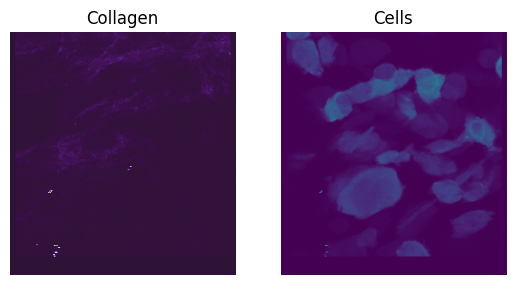

In [4]:
plt.subplot(1,2,1)
plt.imshow(collagen_image_at_time[0], cmap='twilight_shifted')
plt.axis('off')
plt.title(f'Collagen')

plt.subplot(1,2,2)
plt.imshow(collagen_image_at_time[1])
plt.axis('off')
plt.title(f'Cells')

## Pick from 4 generalist Cellpose models
* cyto
* cyto2
* cyto3
* ctyo4

## Or 8 dataset specific models
* tissuenet_cp3: tissuenet dataset.
* livecell_cp3: livecell dataset
* yeast_PhC_cp3: YEAZ dataset
* yeast_BF_cp3: YEAZ dataset
* bact_phase_cp3: omnipose dataset
* bact_fluor_cp3: omnipose dataset
* deepbacs_cp3: deepbacs dataset
* cyto2_cp3: cellpose dataset

In [15]:
def load_all_cellpose():
    ''' Loads every pre-trained cellpose model
    
        Return:
        - models, a dictionary where keys = model name and values = loaded cellpose models  
    '''
    model_lookup = {
            'cyto'   : models.Cellpose(model_type='cyto'),
            'cyto2'  : models.Cellpose(model_type='cyto2'),
            'cyto3'  : models.Cellpose(model_type='cyto3'),
            'nuclei' : models.Cellpose(model_type='nuclei'),
            'tissuenet_cp3'   : models.CellposeModel(model_type='tissuenet_cp3'),
            'livecell_cp3'    : models.CellposeModel(model_type='livecell_cp3'),
            'yeast_PhC_cp3'   : models.CellposeModel(model_type='yeast_PhC_cp3'),
            'yeast_BF_cp3'    : models.CellposeModel(model_type='yeast_BF_cp3'),
            'bact_phase_cp3'  : models.CellposeModel(model_type='bact_phase_cp3'),
            'bact_fluor_cp3'  : models.CellposeModel(model_type='bact_fluor_cp3'),
            'deepbacs_cp3'    : models.CellposeModel(model_type='deepbacs_cp3'),
            'cyto2_cp3'       : models.CellposeModel(model_type='cyto2_cp3'),
    }

    return model_lookup

## Make a prediction using one of the models


In [16]:
cellpose_models = load_all_cellpose()


100%|██████████| 25.3M/25.3M [00:01<00:00, 21.2MB/s]
100%|██████████| 25.3M/25.3M [00:01<00:00, 23.0MB/s]
100%|██████████| 25.3M/25.3M [00:02<00:00, 10.4MB/s]
100%|██████████| 25.3M/25.3M [00:01<00:00, 21.7MB/s]
100%|██████████| 25.3M/25.3M [00:02<00:00, 11.8MB/s]
100%|██████████| 25.3M/25.3M [00:02<00:00, 11.1MB/s]


Choose one model to use, in this case the super-generalist model cyto3 which has been trained on 9 datasets.

In [17]:
cyto3 = cellpose_models['cyto3']

Eval has 2 parameters that should always be considered:
1. **x** - the input image of the correct shape
2. **channels** - a list of size 2 where the first element is the channel to segment and the second is the optional nuclear channel

It outputs 4 values, of which the most important for segmentation is 'masks'.

To read the eval documentation, visit this [link](https://cellpose.readthedocs.io/en/latest/api.html#id10)

Text(0.5, 1.0, 'Prediction')

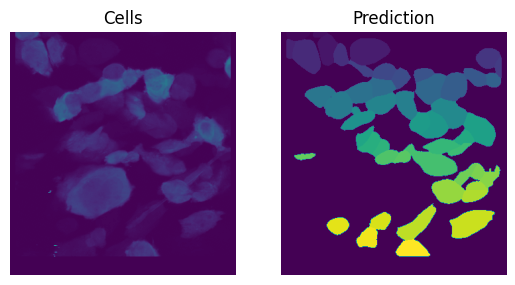

In [28]:
masks, flow, styles, diam = cyto3.eval((collagen_image_at_time), channels=[2, 0])

plt.subplot(1,2,1)
plt.imshow(collagen_image_at_time[1])
plt.axis('off')
plt.title('Cells')

plt.subplot(1,2,2)
plt.imshow(masks)
plt.axis('off')
plt.title('Prediction')

## Test all models on image

In [42]:
def display_cellpose(img, models, chan):

    fig, axs = plt.subplots(3, 5, figsize=(12,5))
    if img.shape[0] == 2:
        display_img = img[1,:,:]
    else:
        display_img = img

    axs[0, 0].imshow(display_img)
    axs[0, 0].axis("off")
    axs[0, 0].set_title("input image")


    for i in range(1,13):
        row = i // 5
        col = i % 5

        model_name = list(models.keys())[i-2]
        model = models[model_name]
        masks, *_ = model.eval(img, diameter=None, channels=chan)
        axs[row, col].imshow(masks)
        axs[row, col].axis("off")
        axs[row, col].set_title(f"{model_name}")

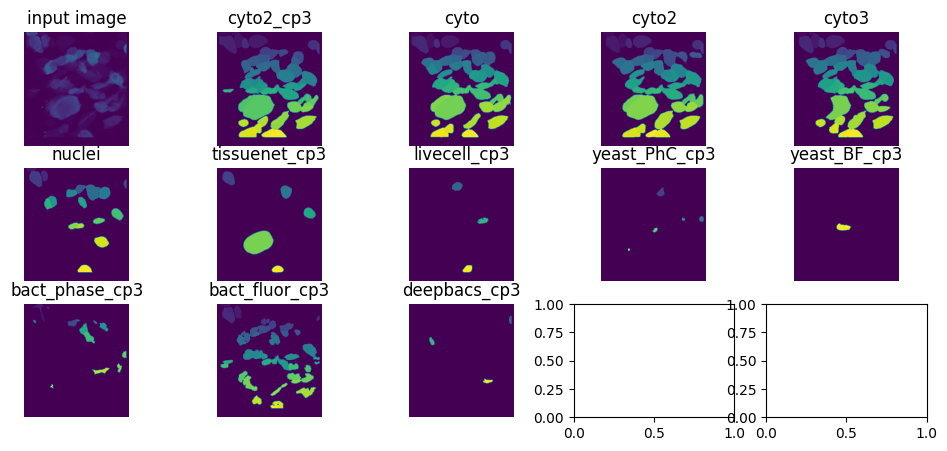

In [47]:
display_cellpose(collagen_image_at_time, cellpose_models, [2,0])